In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, StratifiedKFold,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import numpy as np
import matplotlib.pyplot as plt

In [14]:
epl = pd.read_csv("Project_13803342/dataframed_cleaned/epl_data_matches_copy.csv")

In [15]:
# Creating lists of different features

all_both = ["xga","xg","sh_x", "sot_x","dist_x", "fk_x", "pk_x", "pkatt_x", "sh_y", "sot_y", "dist_y" ,"fk_y" ,"pk_y", "pkatt_y","poss" ,"poss_y" ,"succ%_x" ,"cpa_x", "succ%_y", "cpa_y" ,"kp", "1/3" ,"ppa" ,"crspa" ,"prog", "sca_x", "passlive_x" ,"to_x" ,"sca_y" ,"venue_code" ,"opp_code", "hour", "day_code", "referee_code" ,"formation_code", "captain_code", "tkl_x", "tklw_x", "def 3rd_x", "tkl%_x", "blocks_x", "int_x", "err_x", "tkl_y",  "tklw_y", "def 3rd_y", "tkl%_y", "blocks_y", "int_y", "err_y"
]
both_shooting = ["sh_x", "sot_x","dist_x", "fk_x", "pk_x", "pkatt_x", "sh_y", "sot_y", "dist_y" ,"fk_y" ,"pk_y", "pkatt_y"]
team_shooting = ["sh_x", "sot_x","dist_x", "fk_x", "pk_x", "pkatt_x"]
opp_shooting = ["sh_y", "sot_y", "dist_y" ,"fk_y" ,"pk_y", "pkatt_y"]
both_possession = ["poss_x" ,"poss_y" ,"succ%_x" ,"cpa_x", "succ%_y", "cpa_y"]
team_possession = ["poss_x","succ%_x","cpa_x","1/3"]
opp_possession = ["poss_y","succ%_y","cpa_y"]
team_creation = ["sca_x", "passlive_x" ,"to_x"]
both_def = ["tkl_x", "tklw_x", "def 3rd_x", "tkl%_x", "blocks_x", "sh_x", "int_x", "err_x", "tkl_y", "tklw_y", "def 3rd_y", "tkl%_y", "blocks_y", "sh_y", "int_y", "err_y"]
team_def = ["tkl_x", "tklw_x", "def 3rd_x", "tkl%_x", "blocks_x", "sh_x", "int_x", "err_x"]
opp_def = ["tkl_y", "tklw_y", "def 3rd_y", "tkl%_y", "blocks_y", "sh_y", "int_y", "err_y"]
important = [ "xga", "xg","sot_x", "sot_y", "sh_x", "dist_x", "tkl%_x", "dist_y", "sh_y", "succ%_y", "tkl%_y", "poss_x", "succ%_x", "captain_code", "1/3", "opp_code"]
epl = epl.drop(columns = "target")

f1 = all_both 
f2 = both_shooting
f3 = team_shooting
f4 = opp_shooting 
f5 = both_possession
f6 = team_possession 
f7 = opp_possession 
f8 = team_creation
f9 = both_def 
f10 = team_def 
f11 = opp_def

In [30]:
import pandas as pd


# Defining the columns to normalise
columns_to_normalise = ['xga', 'xg', 'sh_x', 'sot_x', 'dist_x', 'fk_x', 'pk_x', 'pkatt_x', 'sh_y', 'sot_y', 'dist_y', 'fk_y', 'pk_y', 'pkatt_y', 'poss_x', 'poss_y', 'succ%_x', 'cpa_x', 'succ%_y', 'cpa_y', 'kp', '1/3', 'ppa', 'crspa', 'prog', 'sca_x', 'passlive_x', 'to_x', 'sca_y', 'venue_code', 'opp_code', 'hour', 'day_code', 'referee_code', 'formation_code', 'captain_code', 'tkl_x', 'tklw_x', 'def 3rd_x', 'tkl%_x', 'blocks_x','int_x', 'err_x', 'tkl_y', 'tklw_y', 'def 3rd_y', 'tkl%_y', 'blocks_y', 'int_y', 'err_y']

# Creating a Min-max normalisation function
def min_max_normalisation(column):
    return (column - column.min()) / (column.max() - column.min())

# Applying min-max normalisation to selected columns
normalised_data = epl[columns_to_normalise].apply(min_max_normalisation)

# Appending the normalised columns with the original dataframe
epl_normalised = pd.concat([epl.drop(columns=columns_to_normalise), normalised_data], axis=1)


In [29]:
from sklearn.preprocessing import StandardScaler

# Standardising the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(epl[f1])
epl_s = pd.DataFrame(x_scaled, index=epl.index, columns=all_both)

In [18]:
#1 standardised
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVC
from scipy.stats import uniform, randint

X = epl_s
y = epl['result']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining the parameter distributions to sample from

param_dist = {'C': uniform(loc=0, scale=10)}  # Regularization parameter


# Initialising the SVM classifier
svm_classifier = SVC(kernel = "linear")

# Initialising RandomizedSearchCV with SVM classifier and parameter distributions
random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Performing the randomized search
random_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model = random_search.best_estimator_

# Results
cv_results_std = cross_val_score(best_model, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Results:")
print(cv_results_std)
print("Mean Accuracy:", cv_results_std.mean())


Best Hyperparameters: {'C': 0.9767211400638387}
Cross-Validation Results:
[0.61413043 0.67934783 0.61413043 0.6576087  0.64673913 0.5923913
 0.61202186 0.66120219 0.61748634 0.63934426]
Mean Accuracy: 0.6334402470895699


In [19]:
# normalised
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVC
from scipy.stats import uniform, randint

X = epl_normalised[f1]
y = epl['result']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining the parameter distributions to sample from
param_dist = {
    'C': uniform(loc=0, scale=10),  # Regularization parameter
}

# Initialising the SVM classifier
svm_classifier = SVC(kernel = "linear")

# Initialising RandomizedSearchCV with SVM classifier and parameter distributions
random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Performing the randomized search
random_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model = random_search.best_estimator_

# Results
cv_results_norm = cross_val_score(best_model, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Results:")
print(cv_results_norm)
print("Mean Accuracy:", cv_results_norm.mean())

Best Hyperparameters: {'C': 4.722149251619493}
Cross-Validation Results:
[0.61956522 0.66847826 0.60869565 0.65217391 0.65217391 0.60326087
 0.60655738 0.6557377  0.62295082 0.65027322]
Mean Accuracy: 0.6339866951770017


In [20]:
# Balanced w-SMOTE (standardised)
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVC
from scipy.stats import uniform, randint

X = epl_s
y = epl['result']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_train_re,y_train_re = smote.fit_resample(X_train,y_train)

# Defining the parameter distributions to sample from
param_dist = {
    'C': uniform(loc=0, scale=10),  # Regularization parameter
}

# Initialising the SVM classifier
svm_classifier = SVC(kernel = "linear")

# Initialising RandomizedSearchCV with SVM classifier and parameter distributions
random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Performing the randomized search
random_search.fit(X_train_re, y_train_re)

# Getting the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model = random_search.best_estimator_

# Results
cv_results_std_smote = cross_val_score(best_model, X_train_re, y_train_re, cv=10, scoring='accuracy')
print("Cross-Validation Results:")
print(cv_results_std_smote)
print("Mean Accuracy:", cv_results_std_smote.mean())

Best Hyperparameters: {'C': 0.20584494295802447}
Cross-Validation Results:
[0.58482143 0.56696429 0.57589286 0.625      0.59821429 0.55803571
 0.5625     0.65178571 0.60538117 0.61434978]
Mean Accuracy: 0.5942945227418323


In [28]:
# balanced w-SMOTE (normalised)
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVC
from scipy.stats import uniform, randint

X = epl_normalised[f1]
y = epl['result']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_train_re,y_train_re = smote.fit_resample(X_train,y_train)

# Defining the parameter distributions to sample from
param_dist = {
    'C': uniform(loc=0, scale=10),  # Regularization parameter
}

# Initialising the SVM classifier
svm_classifier = SVC(kernel = "linear")

# Initialising RandomizedSearchCV with SVM classifier and parameter distributions
random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Performing the randomized search
random_search.fit(X_train_re, y_train_re)

# Getting the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model = random_search.best_estimator_

# Results
cv_results_norm_smote = cross_val_score(best_model, X_train_re, y_train_re, cv=10, scoring='accuracy')
print("Cross-Validation Results:")
print(cv_results_norm_smote)
print("Mean Accuracy:", cv_results_norm_smote.mean())

Best Hyperparameters: {'C': 7.13244787222995}
Cross-Validation Results:
[0.58035714 0.56696429 0.55803571 0.59375    0.59375    0.55357143
 0.59375    0.66964286 0.58744395 0.64573991]
Mean Accuracy: 0.594300528507367


In [22]:
# Returning the results of the Cross-Validation
print("Accuracy of unbalanced dataset: ")
print("Standardised", cv_results_std.mean())
print("Normalised",cv_results_norm.mean())
print("\nAccuracy of balanced dataset with SMOTE: ")
print("Standardised" , cv_results_std_smote.mean())
print("Normalised",cv_results_norm_smote.mean())


Accuracy of unbalanced dataset: 
Standardised 0.6334402470895699
Normalised 0.6339866951770017

Accuracy of balanced dataset with SMOTE: 
Standardised 0.5942945227418323
Normalised 0.594300528507367


In [26]:
#BEST MODEL
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVC
from scipy.stats import uniform, randint

X = epl_s
y = epl['result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter distributions to sample from

param_dist = {'C': uniform(loc=0, scale=10)}  # Regularization parameter


# Initialize the SVM classifier
svm_classifier = SVC(kernel = "linear")

# Initialize RandomizedSearchCV with SVM classifier and parameter distributions
random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Perform the randomized search
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

best_model.fit(X_train,y_train)
pred = best_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, pred)
print("Test Accuracy:",accuracy)
report = classification_report(y_test,pred)
print(report)
conf_matrix = confusion_matrix(y_test,pred)
print(conf_matrix)

Best Hyperparameters: {'C': 0.9767211400638387}
Test Accuracy: 0.6429479034307497
              precision    recall  f1-score   support

           D       0.43      0.17      0.25       184
           L       0.68      0.77      0.72       287
           W       0.65      0.80      0.72       316

    accuracy                           0.64       787
   macro avg       0.59      0.58      0.56       787
weighted avg       0.61      0.64      0.61       787

[[ 32  66  86]
 [ 18 220  49]
 [ 24  38 254]]


['D' 'L' 'W']


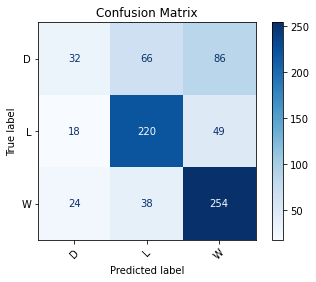

0.5881336921039862 : is the precision score
0.581420344826925 : is the recall score
0.5629201080957638 : is the f1 score
Highest accuracy score of Decision Tree: 
64.29


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
unique_labels = np.unique(y)
print(unique_labels)
cm = confusion_matrix(y_test,pred)
classes = ['D', 'L', 'W']


# Plotting the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xticks(rotation=45) 
plt.show()

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, pred, average='macro'), ": is the precision score")
print(recall_score(y_test, pred, average='macro'), ": is the recall score")
print(f1_score(y_test, pred, average='macro'), ": is the f1 score")

best = accuracy * 100
print("Highest accuracy score of Decision Tree: ")
print(round(best,2))


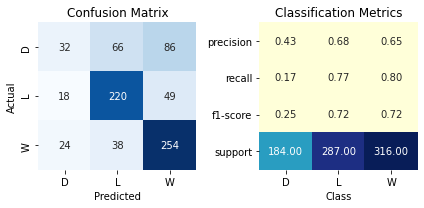

0.5881336921039862 : is the precision score
0.581420344826925 : is the recall score
0.5629201080957638 : is the f1 score
Highest accuracy score for Naives Bay: 
64.29


In [27]:

import seaborn as sns
class_names = ["D", "L","W"]
report = classification_report(y_test, pred, target_names=class_names, output_dict=True)

# Setting up plot size and style
plt.figure(figsize=(6, 3))

# Plotting confusion matrix heatmap
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True,cbar=False, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plotting classification report heatmap
plt.subplot(1, 2, 2)
sns.heatmap(np.array([[report[label][metric] for label in class_names] for metric in report[class_names[0]]]),
            annot=True, cbar=False,fmt=".2f", cmap="YlGnBu", xticklabels=class_names, yticklabels=report[class_names[0]].keys())

plt.xticks(rotation=0)
plt.yticks(rotation=0)
#plt.ylabel("Metrics")
plt.xlabel("Class")
plt.title("Classification Metrics")

# Adjusting layout and show the plot
plt.tight_layout()
plt.show()

print(precision_score(y_test, pred, average='macro'), ": is the precision score")
print(recall_score(y_test, pred, average='macro'), ": is the recall score")
print(f1_score(y_test, pred, average='macro'), ": is the f1 score")

best = accuracy * 100
print("Highest accuracy score for Naives Bay: ")
print(round(best,2))
